<span style="color:yellow"> The term <span style="color:magenta"><strong>cases</strong></span> will be used to indicate all types of cases i.e. <strong>Confirmed, Death and Recovered</strong>.<br>In case of a specific type of case the type will be mentioned</span>
### DATA TO BE REPRESENTED:-
1. Number of cases every day:-
    1. Globally.
    2. In a particular Country / Region.
    3. Filetering based on a given count i.e. > 1000 cases etc.
    4. Sorting in a partcular order.
2. Number of cases in span of some days:-
    1. Globally.
    2. In a particular Country / Region.
    3. Filetering based on a given count i.e. > 1 Lac cases etc.
    4. Sorting in a partcular order.
3. Displaying cases on a map:-
    1. Entire world map.
    2. A particular country / region.
    3. Displaying regions with some threshold number of cases i.e. > 1 Lac cases etc.
    4. Types of cases differentiated based on colors.
    5. Types of cases differentiated based on range of cases i.e. 0 - 10000, 10000 - 1 lac etc.
4. Think of different types of graphs that can be used:-
    1. Line graphs
    2. Scatter plots.
    3. Pie charts.
    4. World maps.
5. A race among the countries based on the number of active covid cases. (Horizontal bar charts)
6. Current  / Live data of countries / regions.
7. Give short summarized forms of covid articles.
8. Provide relevant covid research papers.

## IMPORTING DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import geopandas as gpd

In [19]:
mp.style.use('fivethirtyeight')
COLOR = 'black'
mp.rcParams['text.color'] = COLOR
mp.rcParams['axes.labelcolor'] = COLOR
mp.rcParams['xtick.color'] = COLOR
mp.rcParams['ytick.color'] = COLOR

In [10]:
# mp.style.available

## COVID DATA URLS

In [11]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [12]:
confirmed_data = pd.read_csv(confirmed_url)
deaths_data = pd.read_csv(deaths_url)
recovered_data = pd.read_csv(recovered_url)

In [13]:
confirmed_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,189,197,212,212,259,267,276,284,291,315


In [14]:
# deaths_data.head()

In [15]:
# recovered_data.head()

In [16]:
melted_confirmed_data = pd.melt(confirmed_data, id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name = 'Date', value_name = 'Counts')
melted_deaths_data = pd.melt(deaths_data, id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name = 'Date', value_name = 'Counts')
melted_recovered_data = pd.melt(recovered_data, id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name = 'Date', value_name = 'Counts')

In [17]:
melted_confirmed_data.head()

,Province/State,Country/Region,Lat,Long,Date,Counts
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


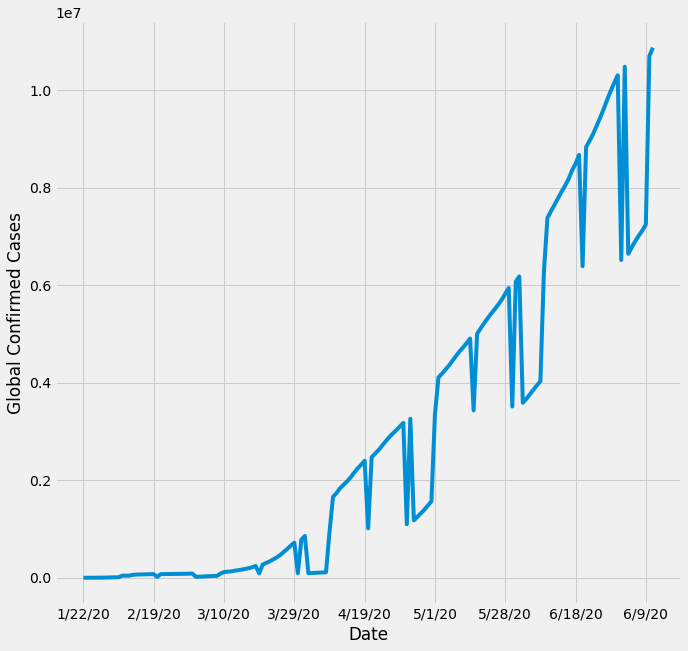

In [20]:
mp.figure(figsize = (10, 10))
mp.ylabel('Global Confirmed Cases')
mp.xlabel('Date')
melted_confirmed_data.groupby('Date')['Counts'].sum().plot()

In [33]:
melted_confirmed_data.groupby(['Country/Region', 'Date']).sum()

Lat  Long  Counts
Country/Region Date                       
Afghanistan    1/22/20  33.0  65.0       0
               1/23/20  33.0  65.0       0
               1/24/20  33.0  65.0       0
               1/25/20  33.0  65.0       0
               1/26/20  33.0  65.0       0
...                      ...   ...     ...
Zimbabwe       6/5/20  -20.0  30.0     265
               6/6/20  -20.0  30.0     279
               6/7/20  -20.0  30.0     282
               6/8/20  -20.0  30.0     287
               6/9/20  -20.0  30.0     314

[30268 rows x 3 columns]

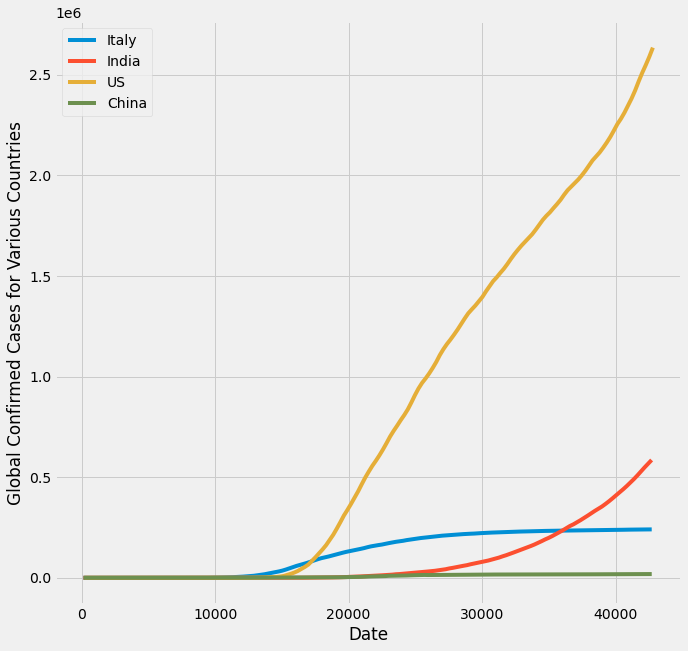

In [67]:
mp.figure(figsize = (10, 10))
mp.ylabel('Global Confirmed Cases for Various Countries')
mp.xlabel('Date')
melted_confirmed_data.groupby(['Country/Region'])['Counts'].get_group('Italy').plot()
melted_confirmed_data.groupby(['Country/Region'])['Counts'].get_group('India').plot()
melted_confirmed_data.groupby(['Country/Region'])['Counts'].get_group('US').plot()
melted_confirmed_data.groupby(['Country/Region'])['Counts'].get_group('Japan').plot()
mp.legend(['Italy', 'India', 'US', 'China'])

In [69]:
melted_confirmed_data.groupby(['Country/Region'])['Counts'].get_group('Afghanistan')

0            0
266          0
532          0
798          0
1064         0
         ...  
41496    30451
41762    30616
42028    30967
42294    31238
42560    31517
Name: Counts, Length: 161, dtype: int64

In [62]:
melted_confirmed_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India